In [1]:
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np


#Load dataset
#split into input (X) and output (y)
X = np.linspace(5,100,20) #This gives 5 to 100 as the instances of feature.
X = X*1.0 #convert to float

y = X**(1/7) #This gives us the exact answer, the instances of target.

X = X.reshape(-1, 1)
'''
Gives the correct shape, (20,1), instead of linspace's (20,)
Otherwise, the plotting does not occur correctly
'''
y = y.reshape(-1, 1)

#define keras model
model = Sequential()

model.add(Dense(6,input_dim=1,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))

#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)



#fit the keras model on the dataset (CPU)
model.fit(X,y,epochs=2000,batch_size=10, verbose=0)
model.summary()

#make class predictions with the model
predictions = model.predict(X)

#summarize the first 10 cases
for i in range(10):
    print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 311 (1.22 KB)

 Trainable params: 103 (412.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 208 (836.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
[5.0] => 1.43 (expected 1.26)
[10.0] => 1.46 (expected 1.39)
[15.0] => 1.49 (expected 1.47)
[20.0] => 1.52 (expected 1.53)
[25.0] => 1.55 (expected 1.58)
[30.0] => 1.58 (expected 1.63)
[35.0] => 1.61 (expected 1.66)
[40.0] => 1.64 (expected 1.69)
[45.0] => 1.67 (expected 1.72)
[50.0] => 1.70 (expected 1.75)


<ipython-input-1-713a3bd48204>:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


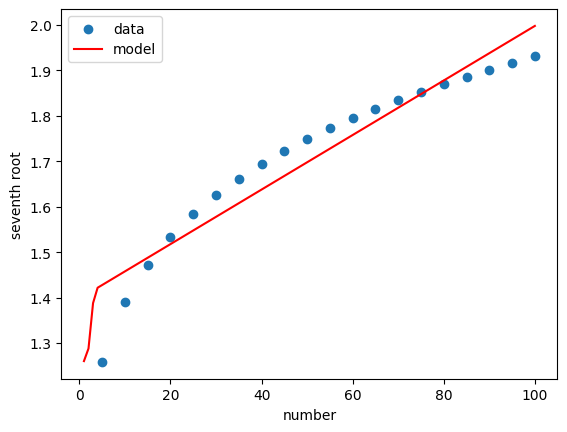

In [2]:
import matplotlib.pyplot as plt
number_grid = np.linspace(1, 100, 100)
plt.scatter(X,y, label='data')
plt.plot(number_grid,model.predict(np.expand_dims(number_grid,axis=1)) , color='red', label='model')
plt.xlabel('number')
plt.ylabel('seventh root')
plt.legend()